## Aufgabe 4 - Prognose erstellen

### a) Berechnung
Allerdings ist die seasonal_decompose-Methode an sich keine Vorhersagemethode, sondern nur eine Zerlegung der Zeitreihe in ihre Komponenten. Für eine Prognose gibt es mehrere Methoden, wie z.B.:

1. Naive Vorhersagen: Basierend auf der letzten bekannten Trend- und Saisonkomponente.
2. ARIMA-Modelle: Eine statistische Methode zur Modellierung der Zeitreihe und zur Vorhersage der nächsten Werte.
3. Exponentielle Glättung: Eine Methode, die vergangene Werte glättet und eine Vorhersage auf Basis von Trends und saisonalen Mustern erstellt.

In diesem Fall werde ich dir den einfacheren Weg mit einer naiven Vorhersage zeigen, basierend auf dem Trend und der Saisonalität, die wir aus der seasonal_decompose-Methode erhalten haben. Dabei gehen wir davon aus, dass der Trend linear weiterläuft und sich die saisonalen Schwankungen wiederholen.

Vorgehen zur Prognose der nächsten 30 Tage:
- Trend extrapolieren: Den Trend, der in der Zeitreihe bisher vorhanden war, linear fortsetzen.
- Saisonkomponente wiederholen: Die saisonalen Muster der letzten Periode (in unserem Fall 365 Tage) für die nächsten 30 Tage wiederholen.
- Rest ignorieren: Die Restkomponente betrachten wir in diesem einfachen Modell als zufälliges Rauschen, das schwer vorherzusagen ist, und lassen es für die Vorhersage weg.

C:\Users\riset\AppData\Local\Temp\ipykernel_40456\4135259386.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  future_seasonal = [last_seasonal_cycle[i % 365] for i in range(forecast_days)]


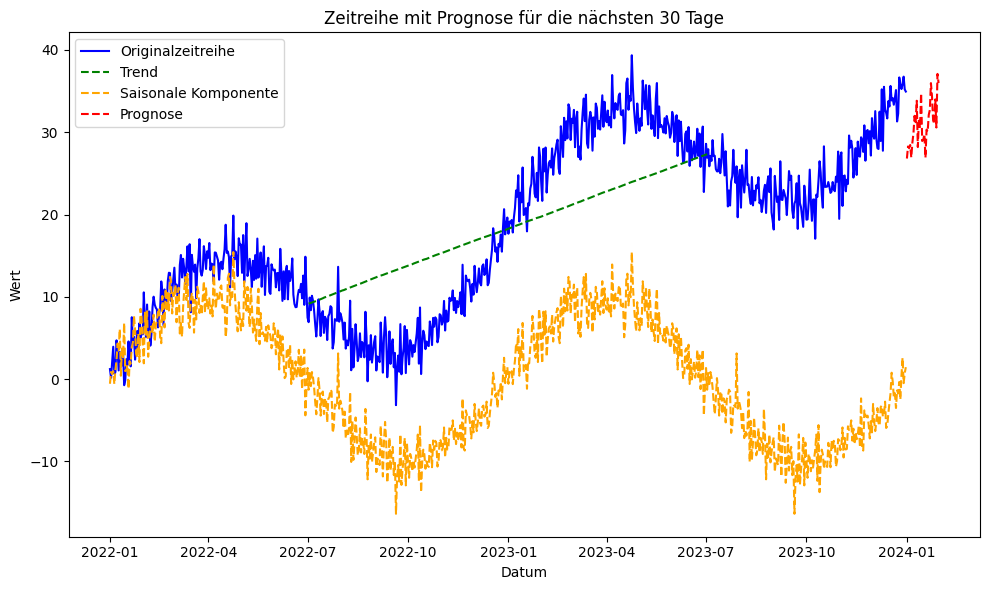

             Prognose
Datum                
2024-01-01  26.802453
2024-01-02  28.267725
2024-01-03  28.060744
2024-01-04  28.448130
2024-01-05  26.923782
2024-01-06  28.725347
2024-01-07  29.879306
2024-01-08  31.988108
2024-01-09  31.216426
2024-01-10  33.823411
2024-01-11  28.197184
2024-01-12  31.678264
2024-01-13  30.513687
2024-01-14  34.736598
2024-01-15  28.932940
2024-01-16  29.074164
2024-01-17  29.764124
2024-01-18  26.908615
2024-01-19  30.314531
2024-01-20  30.066502
2024-01-21  32.100499
2024-01-22  32.701687
2024-01-23  35.966236
2024-01-24  34.309702
2024-01-25  31.447693
2024-01-26  31.003468
2024-01-27  33.984650
2024-01-28  30.572074
2024-01-29  37.084492
2024-01-30  35.977756


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generierung der synthetischen Zeitreihe über 2 Jahre (730 Tage)
dauer = 2 * 365
def generate_time_series():
    t = np.arange(1, dauer + 1)

    # Trend-Komponente (T)
    T = 0.05 * t

    # Saisonale Komponente (S) - 1-jähriger Zyklus
    S = 10 * np.sin(2 * np.pi * t / 365)

    # Rauschkomponente (R) - zufälliges Rauschen
    np.random.seed(42)  # Für reproduzierbare Ergebnisse
    R = np.random.normal(0, 2, len(t))

    # Gesamte Zeitreihe (Y)
    Y = T + S + R

    df = pd.DataFrame({
        'Datum': pd.date_range(start='2022-01-01', periods=dauer, freq='D'),
        'Wert': Y
    })
    df.set_index('Datum', inplace=True)
    return df

# Zerlegung der Zeitreihe und Berechnung der Prognose
def decompose_and_forecast(df, forecast_days=30):
    # Zerlegung in additive Komponenten
    decomposition = seasonal_decompose(df['Wert'], model='additive', period=365)

    # Komponenten extrahieren
    trend = decomposition.trend
    seasonal = decomposition.seasonal

    # Lineare Fortsetzung des Trends
    trend_last_value = trend.dropna().values[-1]  # Letzter Wert des Trends
    trend_slope = (trend.dropna().values[-1] - trend.dropna().values[-2])  # Steigung des Trends

    future_trend = [trend_last_value + trend_slope * i for i in range(1, forecast_days + 1)]

    # Wiederholung der saisonalen Komponente für die nächsten 30 Tage
    last_seasonal_cycle = seasonal[-365:]  # Letzte vollständige Saisonperiode (1 Jahr)
    future_seasonal = [last_seasonal_cycle[i % 365] for i in range(forecast_days)]

    # Erstellung der Prognose (Trend + Saison)
    future_forecast = np.array(future_trend) + np.array(future_seasonal)

    # Erstellung eines DataFrames für die Prognose
    future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='D')
    forecast_df = pd.DataFrame({
        'Datum': future_dates,
        'Prognose': future_forecast
    }).set_index('Datum')

    # Plot der Zeitreihe und der Prognose
    plt.figure(figsize=(10, 6))
    plt.plot(df['Wert'], label='Originalzeitreihe', color='blue')
    plt.plot(trend, label='Trend', color='green', linestyle='--')
    plt.plot(seasonal, label='Saisonale Komponente', color='orange', linestyle='--')
    plt.plot(forecast_df['Prognose'], label='Prognose', color='red', linestyle='--')
    plt.legend(loc='best')
    plt.title("Zeitreihe mit Prognose für die nächsten 30 Tage")
    plt.xlabel("Datum")
    plt.ylabel("Wert")
    plt.tight_layout()
    plt.show()

    # Prognose anzeigen
    print(forecast_df)
    return forecast_df

# Hauptprogramm
if __name__ == "__main__":
    # Generierung der Zeitreihe
    df = generate_time_series()

    # Zerlegung und Prognoseberechnung für die nächsten 30 Tage
    forecast_df = decompose_and_forecast(df, forecast_days=30)


### b) Genauigkeitsaussage
Die Genauigkeit einer Prognose ist ein wesentlicher Aspekt der Zeitreihenanalyse, da sie zeigt, wie gut ein Modell zukünftige Werte vorhersagen kann. Um die Genauigkeit einer Prognose zu bewerten, vergleicht man die vorhergesagten Werte mit den tatsächlichen Werten, die nach dem Prognosezeitraum bekannt werden. Da wir in unserem Beispiel noch keine tatsächlichen Daten für die nächsten 30 Tage haben, können wir diese Prognose nicht direkt validieren. Allerdings gibt es Methoden, um die Prognosegenauigkeit auf der Basis von historischen Daten zu bewerten.

Vorgehen zur Bewertung der Prognosegenauigkeit:
Daten aufteilen: Teile die Zeitreihe in zwei Teile:

__Trainingsdaten__: Der erste Teil, der zur Modellbildung verwendet wird (z.B. 80% der Daten).

__Testdaten__: Der zweite Teil, der zur Bewertung der Prognosegenauigkeit verwendet wird (z.B. die letzten 20% der Daten).
Modell auf Trainingsdaten trainieren: Verwende nur die Trainingsdaten, um die Zerlegung und das Modell zu erstellen.

Vorhersage für den Testzeitraum: Erstelle eine Prognose für den Testzeitraum basierend auf den Trainingsdaten.

Vorhersagegenauigkeit berechnen: Vergleiche die vorhergesagten Werte mit den tatsächlichen Werten aus den Testdaten und berechne Kennzahlen zur Vorhersagegenauigkeit, wie z. B. den Mean Absolute Error (MAE), den Mean Squared Error (MSE) oder den Root Mean Squared Error (RMSE).